# Pruebas técnicas Científico de datos  (65 pts)

Temas a evaluar:
1. Python/R 30%
2. Preprocesamiento 20% 
3. Modelos supervisados y validación 30%
4. Skills base (Generar y responder preguntas de negocio, Validar hipótesis y plantear KPI) 20%

## Prueba técnica Científico de datos - Skill base: Pensamiento estadístico (5 pts)

En un día cualquiera, una compañía e commerce recibe muchas interacciones con anuncios que pueden modelarse como variables aleatorias de Poisson (RV). 

Su supervisor le informa que las interacciones λ se **distribuyen normalmente** con una media de 100k visitantes y una desviación estándar de 2000. Durante el proceso de registro, el cliente ve un anuncio, decide si hace clic o no, y luego si se registra o no. Por lo cual, tanto los clics como las inscripciones son información de tipo binaria y pueden ser modelan mediante una **distribución binomial** de variable aleatoria (RV). 


Actualmente, la compañía cuenta con una solución de bajo costo con un porcentaje de clics del 1% y un porcentaje de suscripciones del 20%. Una opción paga podría aumentar la tasa de clics y de suscripciones hasta un 20%, pero la gerencia de la compañía no está segura del nivel de mejora, por lo que su supervisor le pide modelar la probabilidad p de éxito con el objetivo de aumentar el porcentaje de clicks y suscripciones. 

Criterios de evaluación:
- El candidato identifica y utiliza distribuciones estadísticas según el comportamiento de los datos (1 pts)
- El candidato utiliza de forma adecuada probabilidades (1 pts)
-El candidato demuestra una adecuada comprensión lectora y razonamiento estadístico (3 pts)

In [ ]:
import numpy as np

ct_rate = {'low':0.01, 'high':np.random.uniform(low=0.01, high=1.2*0.01)}
su_rate = {'low':0.2, 'high':____(low=0.2, high=1.2*____)}

def get_signups(cost, ct_rate, su_rate, sims):
    lam = np.random.normal(loc=100000, scale=2000, size=sims)
    impressions = np.random.poisson(lam=lam)
    clicks = np.random.binomial(impressions, p=ct_rate[cost])
    signups = ____
    return signups

print("Simulated Signups = {}".format(get_signups('high', ct_rate, su_rate, 1)))

Después de modelar la cantidad de suscripciones estimadas, su supervisor le solicita modelar el proceso de generación de ingresos. Una vez que el cliente se ha inscrito, decide si compra o no. 

El negocio tiene como supuesto que el 10% de las inscripciones dan lugar a una compra y, aunque los clientes pueden realizar muchas compras, le solicitan modelar una unica compra como un **momento de verdad**. Aunque el valor de la compra podría modelarse con cualquier distribución aleatoria continua, le solicitan realizarla como una **distribución exponencial**. 

Suponga que el valor de la compra por cliente ha sido, en promedio, de unos 1000 dólares. Los ingresos, entonces, son simplemente la suma de todos los valores de compra.

In [ ]:
def get_revenue(signups):
    rev = []
    np.random.seed(123)
    for s in signups:
        # Model purchases as binomial, purchase_values as exponential
        purchases = np.random.binomial(s, p=____)
        purchase_values = np.random.exponential(scale=___, size=purchases)
        
        # Append to revenue the sum of all purchase values.
        rev.append(____)
    return rev

print("Simulated Revenue = ${}".format(get_revenue(get_signups('low', ct_rate, su_rate, 1))[0]))

Unas semanas después de realizar el análisis, la empresa le indica que tiene la opción de gastar dinero extra, digamos 3.000 dólares, para rediseñar el anuncio. Esto podría hacer que aumentaran las tasas de clics y de registro, pero no está garantizado. Por lo cual, les gustaría saber si el costo del rediseño podría generar perdidas de dinero. Siendo el aumento de las interacciones insuficiente para cubrir el costo de rediseño.

Su supervisor le solicita realizar la evaluación en términos de probabilidad de pérdida y emitir un concepto respecto al rediseño o no del anuncio.

In [ ]:

# Initialize sims
sims, cost_diff = 10000, ____

# Get revenue when the cost is 'low' and when the cost is 'high'
rev_low = get_revenue(get_signups('low', ct_rate, su_rate, sims))
rev_high = ____

# calculate fraction of times rev_high - rev_low is less than cost_diff
frac = sum([rev_high[i] - rev_low[i] < cost_diff for i in range(len(rev_low))])/len(rev_low)
print("Probability of losing money = {}".format(frac))

## Prueba técnica Científico de datos - Skill: Programación (10 pts)

Un problema típico para empresas de datos es tener grandes cantidades de información desordenada. Una de las tareas iniciales de cada proyecto es organizar la data. 

En este ejemplo, contamos con un vector con números desordenados los cuales deben ser ordenados. Para hacerlo, su supervisor le indica que debe realizar una función que tenga como entrada un array de n cantidad de elementos de tipo integer y ordenarlo mediante la técnica de insertion. Esta técnica puede observarse en la Figura 1.

Criterios de evaluación

- El candidato demuestra un adecuado uso de las estructuras cíclicas (for, while) (2 pts)

- El candidato utiliza de forma adecuada estructuras condicionales  (2 pts)

- El candidato demuestra una adecuada lógica de programación (6 pts)


      
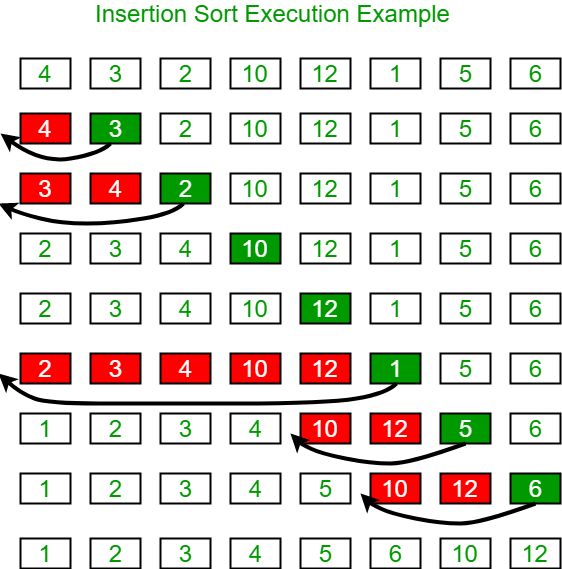

         Figura 1. Algoritmo Sort tipo Insertion

In [ ]:
import numpy as np

def insertion_sort(x):
    for i in _______:



    return sorted_x

x = [4,3,2,10,12,1,5,6]

sorted = insertion_sort(x)

## Prueba técnica Científico de datos - Skill: Preprocesamiento de información (25 pts)


Con la data adjunta (Student-mat.csv) realice los siguientes pasos:


Descripción base de datos por característica:

1 School - escuela del estudiante (binario: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira) 2 sex  - sexo del estudiante (binario: 'F' - mujer o 'M' - hombre) 3 age - edad del estudiante (numérico: de 15 a 22) 4 address  - tipo de domicilio del estudiante (binario: 'U' - urbano o 'R' - rural) 5 famsize - tamaño de la familia (binario: 'LE3' - menor o igual a 3 o 'GT3' - mayor de 3) 6 Pstatus - estado de convivencia de los padres (binario: "T" - convivencia o "A" - separación) 7 Medu - educación de la madre (numérico: 0 - ninguna, 1 - educación primaria (4º grado), 2 - 5º a 9º grado, 3 - educación secundaria o 4 - educación superior) 8 Fedu - educación del padre (numérico: 0 - ninguna, 1 - educación primaria (4º grado), 2 - 5º a 9º grado, 3 - educación secundaria o 4 - educación superior) 9 Mjob - trabajo de la madre (nominal: "profesor", relacionado con la atención sanitaria, "servicios" civiles (por ejemplo, administrativo o policía), "en_casa" u "otro") 10 Fjob - trabajo del padre (nominal: "profesor", "sanitario", "servicios" civiles (por ejemplo, administrativo o policía), "en_casa" u "otro") 11 reason - razón para elegir este centro (nominal: cerca de "casa", "reputación" del centro, preferencia de "curso" u "otro") 12 tutor - tutor del alumno (nominal: "madre", "padre" u "otro") 13 traveltime  - tiempo de viaje de casa a la escuela (numérico: 1 - < 15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, o 4 - >1 hora) 14 studytime - tiempo de estudio semanal (numérico: 1 - < 2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, o 4 - >10 horas) 15 failures - número de fracasos de clase anteriores (numérico: n si 1<=n< 3, sino 4) 16 schoolsup - apoyo educativo extra (binario: sí o no) 17 famsup - apoyo educativo familiar (binario: sí o no) 18 paid - clases extra pagadas dentro de la asignatura del curso (Matemáticas o Portugués) (binario: sí o no) 19 activities - actividades extracurriculares (binario: sí o no) 20 nursery - asistió a la escuela infantil (binario: sí o no) 21 higher - quiere cursar estudios superiores (binario: sí o no) 22 internet - acceso a internet en casa (binario: sí o no) 23 romantic - con una relación romántica (binario: sí o no) 24 famrel - calidad de las relaciones familiares (numérico: de 1 - muy malo a 5 - excelente) 25 freetime - tiempo libre después de la escuela (numérico: de 1 - muy bajo a 5 - muy alto) 26 goout - salir con amigos (numérico: de 1 - muy bajo a 5 - muy alto) 27 Dalc - consumo de alcohol en el día de trabajo (numérico: de 1 - muy bajo a 5 - muy alto) 28 Walc - consumo de alcohol en el fin de semana (numérico: de 1 - muy bajo a 5 - muy alto) 29 health - estado de salud actual (numérico: de 1 - muy malo a 5 - muy bueno) 30 absences - número de ausencias escolares (numérico: de 0 a 93)



Instrucciones:



1.   Cargar la base de datos como Dataframe
2.Realizar un análisis exploratorio de la base de datos intentando identificar variables linealmente separables así como cuáles de las variables numéricas están correlacionadas con la columna G3. (Generar un informe con gráficas y principales KPI identificados)
3.   Transforme las variables categóricas a variables numéricas
4.   Normalice los datos entre -1 y 1
5.   Separe los datos en 3 conjuntos, Train, Test y Validation
6.   Aplique algún método de selección de características (PCA, KBest, entre otros) con el conjunto de validación y justifique porque utilizó ese método
7.   Prediga la variable G3 mediante un modelo de regresión entrenado con todas las características (excepto G1,G2 y G3)
8. Prediga la variable G3 mediante un modelo de regresión entrenado con las características óptimas. 
9. Concluya según sus hallazgos.

Criterios de evaluación:

- El candidato realiza de forma satisfactoria un análisis exploratorio de los datos identificando claramente KPIs y tendencias en los datos. (4pts)

- El candidato demuestra conocimientos en transformación de variables. (4pts)

- El candidato demuestra conocimientos en normalización de variables. (4pts)

- El candidato demuestra conocimientos en métodos básicos de selección de variables. (4pts)

- El candidato demuestra conocimientos básicos en modelos de regresión. (4pts)


## Prueba técnica Científico de datos - Skill: Modelos supervisados - Validación (25 pts)


Con la data adjunta (Data_titanic.csv) realice los siguientes pasos:

La base de datos contiene los siguientes campos:

Campo  // Descripción // Valores 
survival // Survival  // 0 = No, 1 = Yes
pclass  // Ticket class // 1 = 1st, 2 = 2nd, 3 = 3rd
sex // Sex  //  male, female
Age // Age in years //  
sibsp // # of siblings // spouses aboard the Titanic  
parch // # of parents //  children aboard the Titanic 
ticket // Ticket number //  
fare // Passenger fare  
cabin // Cabin number 
embarked //   Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

Instrucciones:



1.  Cargar las bases de datos como Dataframe
2.  Dividir la base de datos en 2 partes: Train y test. Garantizar que la distribución de clases sea igual en el set de Train y Test.
3.  Seleccione un modelo de clasificación de cada uno de los tipos de modelos presentados a continuación: 

> a) Modelos semi-estadisticos (KNN, Naive Bayes, LDA)
> b) Modelos por umbral (Decisión trees, random forests, LogisticRegression)
> c) Modelos por identificación de frontera de decisión
(SVM, Perceptron, Fuzzy learning, Ensemble)

4. Proponga un esquema de entrenamiento y validación de los modelos seleccionados. El entrenamiento deberá garantizar que tuvo en cuenta tecnicas de balance de clases (Se sugiere SMOTE o ADASYN). Así mismo, la etapa de validación deberá tener su respectiva matriz de confusión y el cálculo de un reporte de desempeño con métricas como: Sensibilidad, Accuracy, f1 score, entre otros.

5. Realice el entrenamiento y validación. Reporte los resultados.

6. Concluya cuál es el mejor clasificador y por qué. Así mismo, justifique la técnica utilizada para la selección de hiperparámetros en los clasificadores que aplique. 

Criterios de evaluación: 

- El candidato demuestra el conocimiento y manejo de diferentes tipos de modelos de clasificación (5 pts)

- El candidato demuestra el conocimiento de conceptos como desbalance de clase y demuestra conocimientos en técnicas de balance de clases (5 pts)

- El candidato demuestra conocimientos en métricas de desempeño derivados de la matriz de confusión (5 pts)

- El candidato demuestra una adecuada capacidad de análisis de las ventajas y desventajas de cada método de clasificación (10 pts)